# Notebook for Project 2

### Use the outputs of computeMatrix for the plotProfile function and generate a simple visualization of the read counts from the IP samples across the body of genes from the hg38 reference.

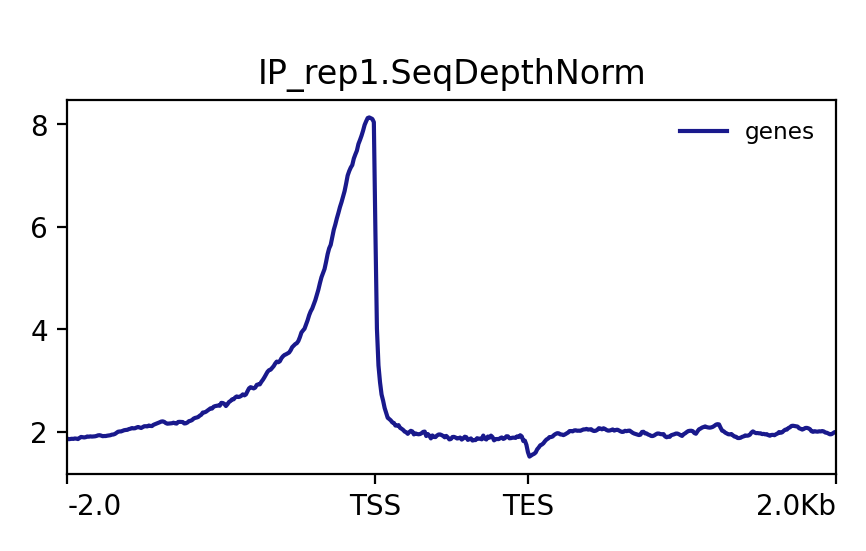

In [2]:
from IPython.display import Image, display
display(Image(filename='results/IP_rep1_profile.png'))

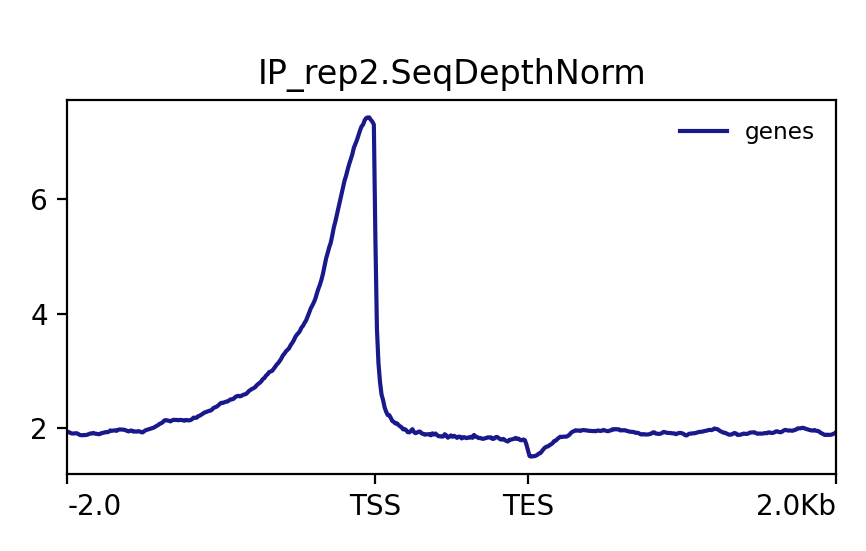

In [3]:
display(Image(filename='results/IP_rep2_profile.png'))

These figures were generated from compute matrix function based on the bigwig summary and hg38 (human) genome from ucsc genome broswer. The input data, IP replicates were mapped to human reference genome.   
In the above figures, x axis has TSS (Transcription Start Site) and TES (Transcription End Site) and 2 kb upstream and downstream of the those sites. On y axis, we have the signal intensity. From both of these figures, the signal intensity spikes up before TSS, and dips at TES. From the above figures, we can see a consistent enrichment pattern across both replicates, with strong, reproducible binding of the factor of interest at or near promoter regions. The background noise it to a minimum.  

### Please make a table or take a screenshot of the top ten enriched motifs that are found from the motif analysis. Write a short paragraph discussing the top results you found and what you believe the results indicate.

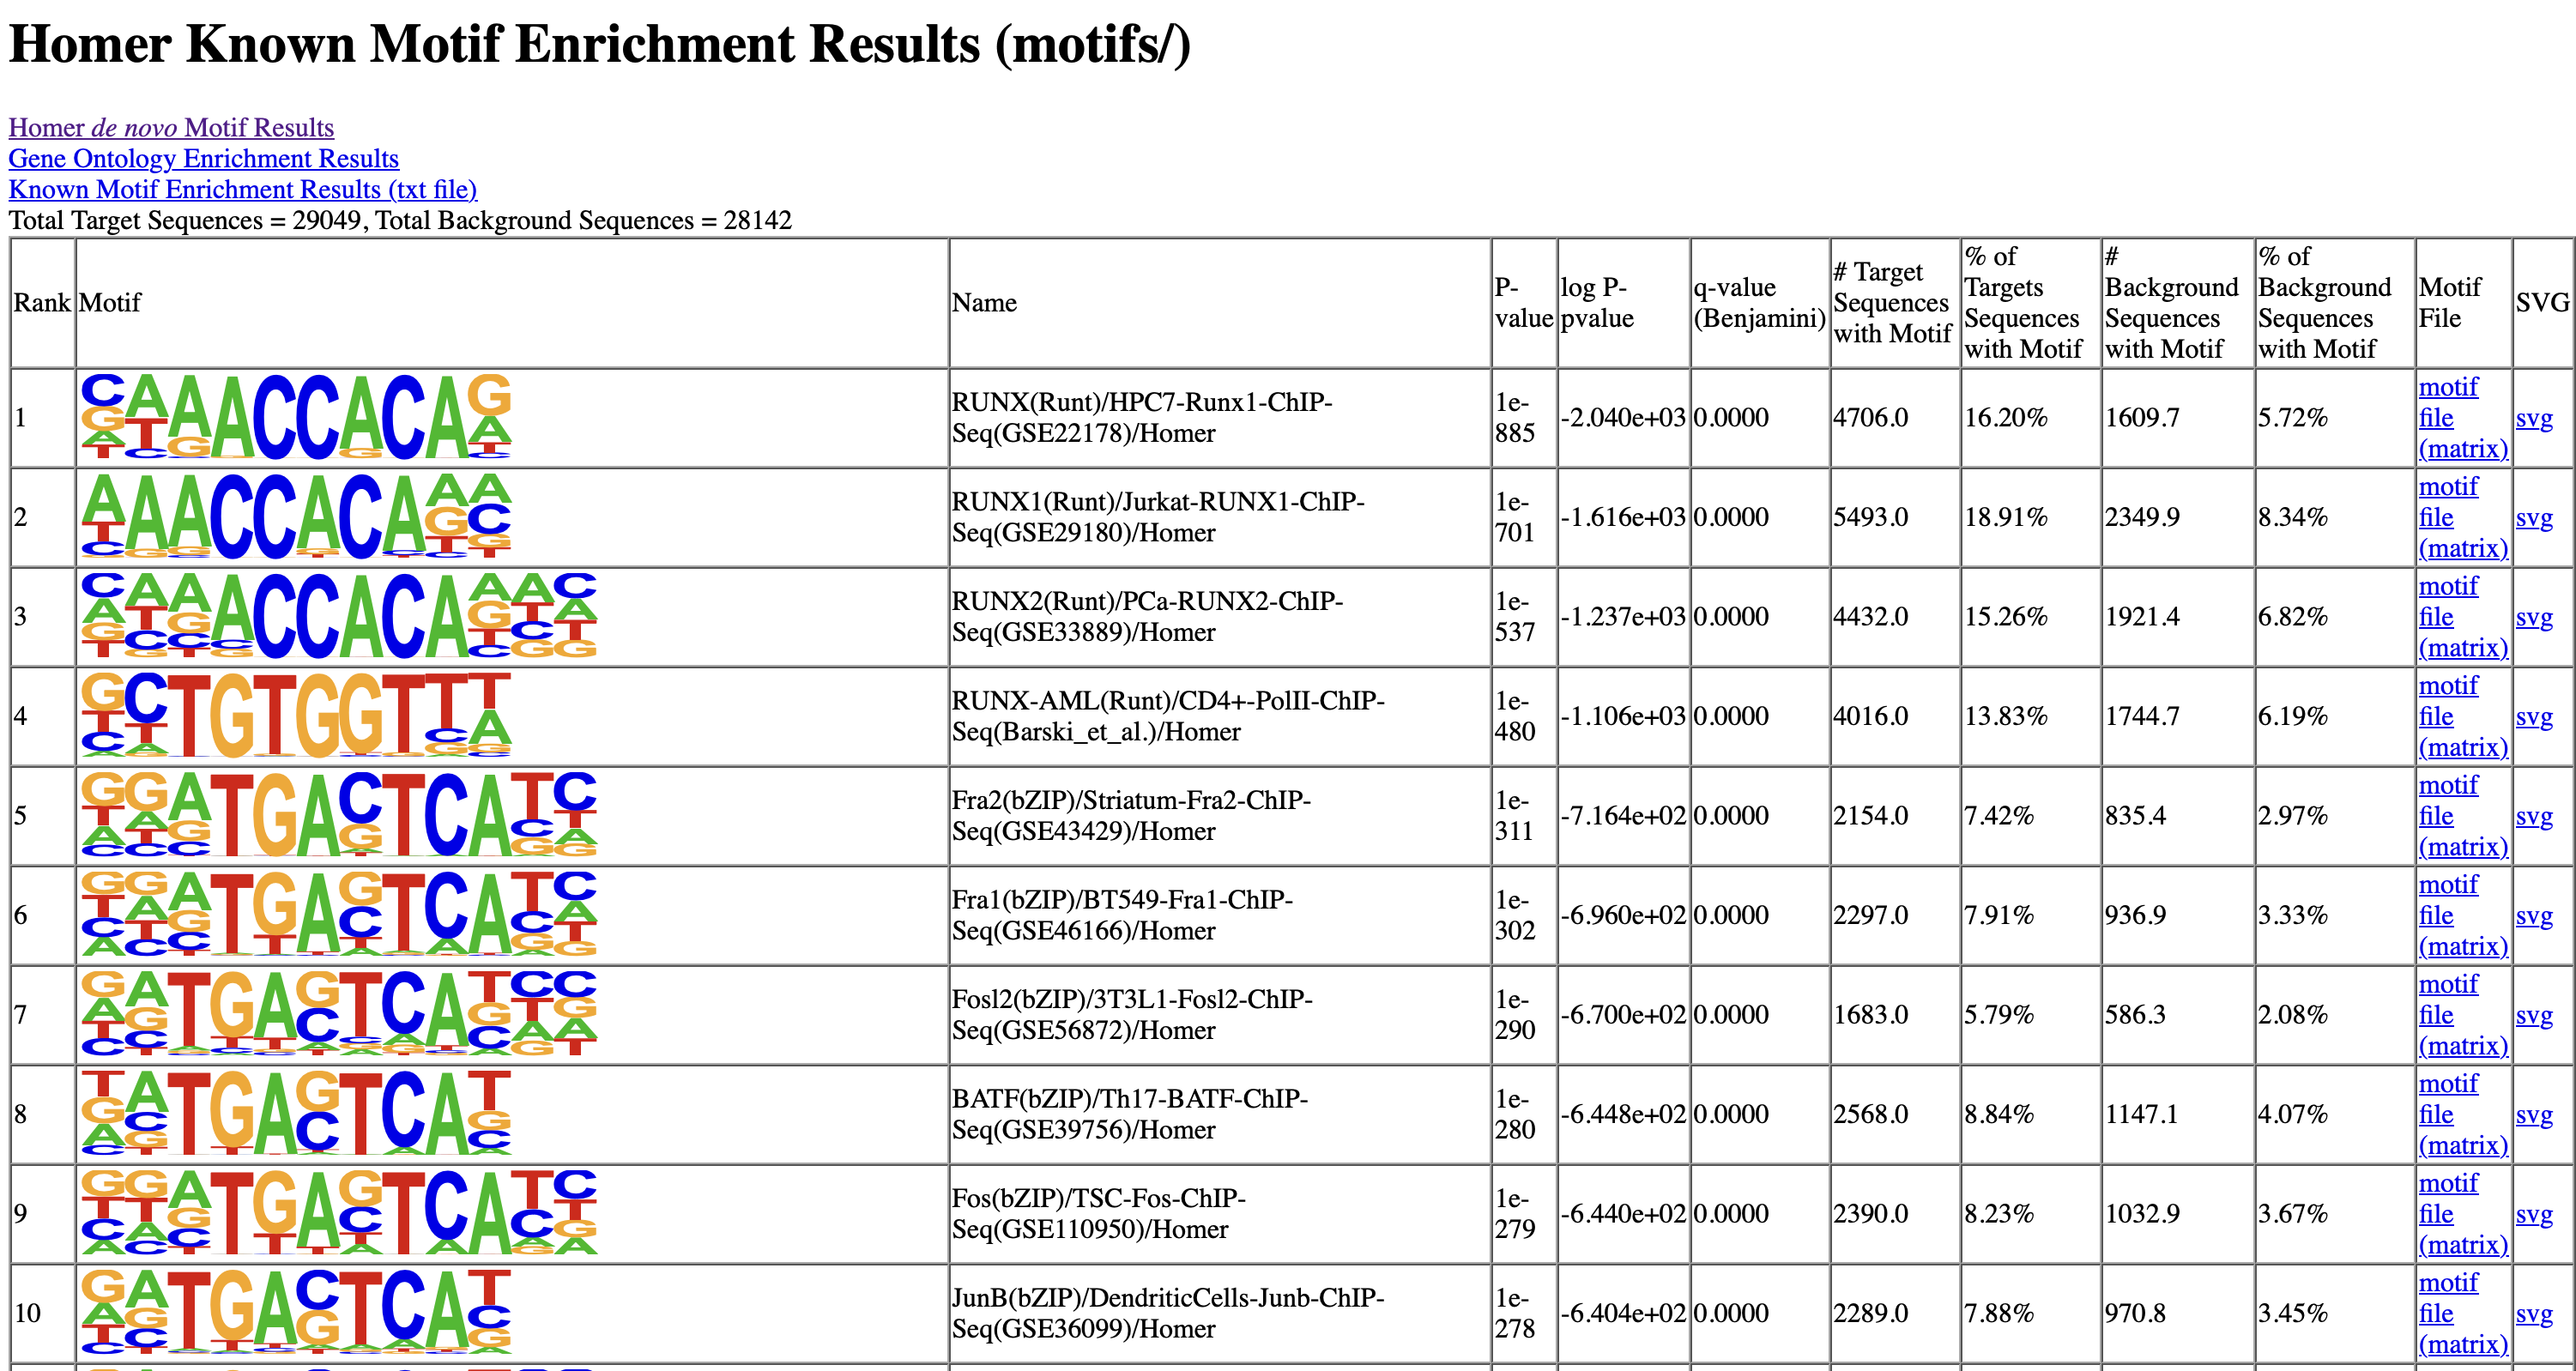

From the known motifs results using Homer annotation tool:  
1-4: RUNX family - RUNX refers to a family of transcription factors, including RUNX1, RUNX2, and RUNX3, which play crucial roles in development, cell differentiation, and disease, particularly cancer. 
5-7, 9: members of the Fos transcription factor family and plays a crucial role in various cellular processes, including cell growth, proliferation, and differentiation. Fra-2 is a subunit of the AP-1 transcription factor complex, which is involved in MAPK signaling and plays a role in tumorigenesis. 
8: Leucine zipper
10: JunB is a proto-oncogene that codes for a protein involved in the AP-1 transcription factor complex.

It is clear that the samples are from enriched cancer pathways or genes.

## Methods

ChIP-seq data were processed using a modular and reproducible pipeline implemented in Nextflow (DSL2). Raw FASTQ files underwent initial quality assessment using FastQC, followed by adapter trimming with Trimmomatic. Trimmed reads were re-evaluated with FastQC before alignment to the hg38 reference genome using Bowtie2. Aligned reads were converted to BAM format, sorted, and indexed with SAMtools. Quality metrics were collected using SAMtools flagstat, and summary reports were generated via MultiQC. Signal tracks were produced using deepTools bamCoverage, and biological replicate consistency was assessed via multiBigwigSummary and plotCorrelation. Peak calling was performed using MACS3, comparing IP samples against their matched INPUT controls. Reproducible peaks were identified by intersecting biological replicates, followed by blacklist filtering using BEDTools. Functional annotation was performed with HOMER, and motif enrichment analysis was conducted using findMotifsGenome.pl. Scaled signal profiles across gene bodies were generated using computeMatrix and visualized with plotProfile.

## Reading MultiQC Report

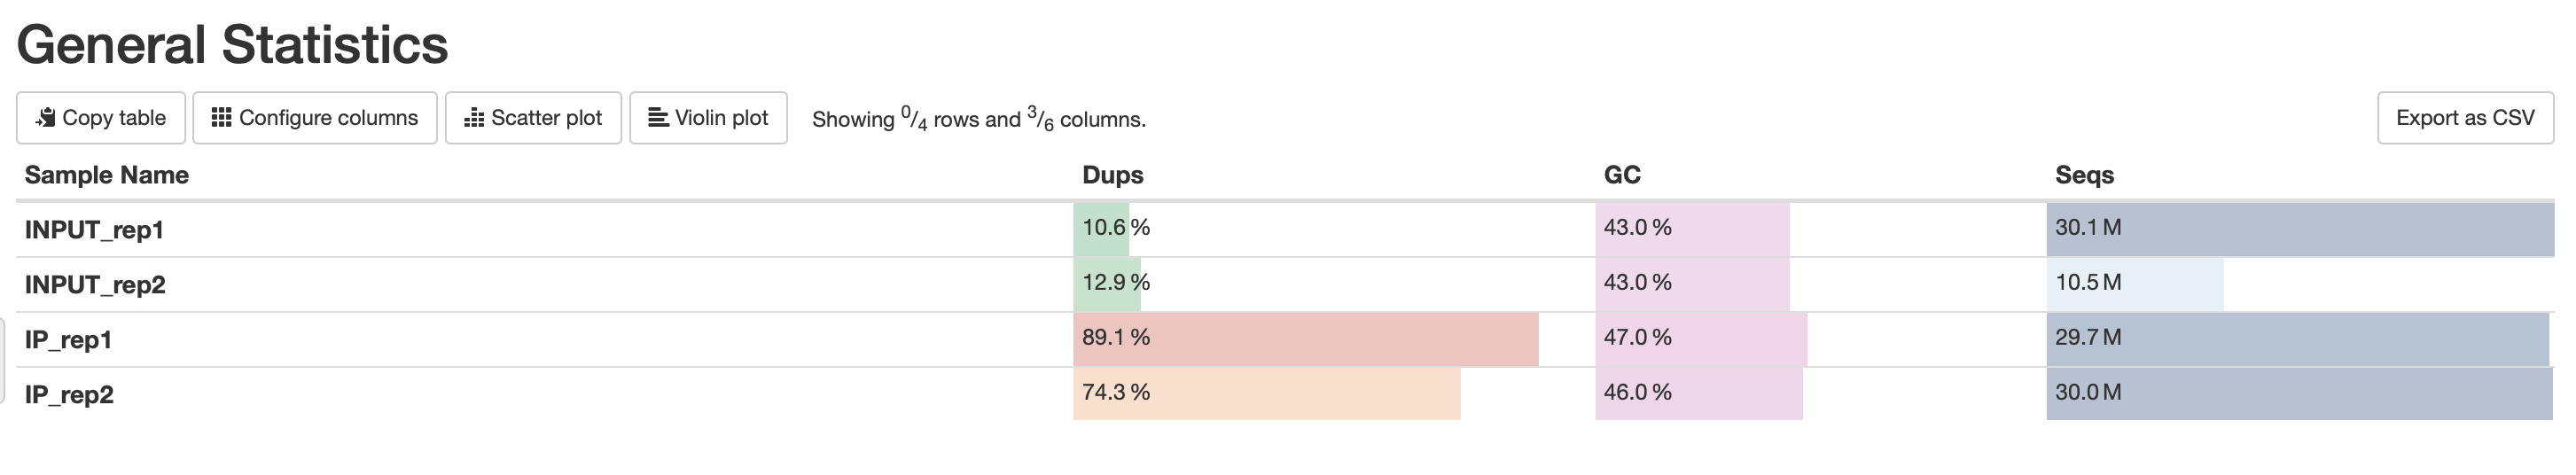

The MultiQC report generated following re-analysis of the full dataset indicates that the overall sequencing quality is high and the data are suitable for downstream ChIP-seq analysis. The input samples have low duplication rates (around 10–13%), showing that they have good complexity. The IP samples have higher duplication (74–89%), which is expected due to enrichment, but the duplication in IP_rep1 is very high and could reduce the amount of useful data. Most samples have around 30 million reads, which is enough for analysis, but INPUT_rep2 has fewer reads (10.5 million). The input samples have low duplication rates (around 10–13%), showing that they have good complexity. The IP samples have higher duplication (74–89%), which is expected due to enrichment, but the duplication in IP_rep1 is very high and could reduce the amount of useful data. Most samples have around 30 million reads, which is enough for analysis, but INPUT_rep2 has fewer reads (10.5 million)

### RUNX1 contributes to higher-order chromatin organization and gene regulation in breast cancer cells

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_venn import venn2

In [5]:
results_df = pd.read_csv('results_article.txt',sep = '\t')
my_df = pd.read_csv('results/annotated_peaks.txt', sep='\t')

In [6]:
my_df

,PeakID (cmd=annotatePeaks.pl results/filtered_peaks.bed hg38),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
0,rep1_peak_270805,chr15,70462783,70463445,+,24559,NaN,Intergenic,Intergenic,42814.0,NR_146562,105370880.0,NaN,NR_146562,ENSG00000259473,LINC02205,-,long intergenic non-protein coding RNA 2205,ncRNA
1,rep1_peak_62385,chr1,205211240,205211902,+,24460,NaN,"5' UTR (NM_199462, exon 1 of 12)","5' UTR (NM_199462, exon 1 of 12)",131.0,NM_015375,25778.0,NaN,NM_015375,ENSG00000133059,DSTYK,CAKUT1|DustyPK|HDCMD38P|RHDNS1|RIP5|RIPK5|SPG23,dual serine/threonine and tyrosine protein kinase,protein-coding
2,rep1_peak_676008,chr5,178078105,178078779,+,22489,NaN,Intergenic,L3|LINE|CR1,-35090.0,NM_015111,23138.0,NaN,NM_015111,ENSG00000145911,N4BP3,LZTS4,NEDD4 binding protein 3,protein-coding
3,rep1_peak_292482,chr16,11915882,11916377,+,21004,NaN,promoter-TSS (NM_002094),promoter-TSS (NM_002094),-173.0,NM_001130006,2935.0,NaN,NM_002094,ENSG00000103342,GSPT1,551G9.2|ETF3A|GST1|eRF3a,G1 to S phase transition 1,protein-coding
4,rep1_peak_394753,chr2,11498528,11498961,+,19655,NaN,Intergenic,Intergenic,-32567.0,NM_001278277,1876.0,NaN,NM_198256,ENSG00000169016,E2F6,E2F-6,E2F transcription factor 6,protein-coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29040,rep1_peak_86743-2,chr10,29736141,29736164,+,13,NaN,promoter-TSS (NM_001323600),promoter-TSS (NM_001323600),-228.0,NM_001323600,6840.0,NaN,NM_003174,ENSG00000197321,SVIL,MFM10,supervillin,protein-coding
29041,rep1_peak_629459,chr5,5337799,5337832,+,13,NaN,Intergenic,Intergenic,-84862.0,NM_015325,23379.0,NaN,NM_015325,ENSG00000164151,ICE1,KIAA0947,interactor of little elongation complex ELL su...,protein-coding
29042,rep1_peak_70983,chr1,230754828,230754970,+,13,NaN,"intron (NM_001319676, intron 1 of 17)","intron (NM_001319676, intron 1 of 17)",7511.0,NM_006615,10753.0,NaN,NM_006615,ENSG00000135773,CAPN9,GC36|nCL-4,calpain 9,protein-coding
29043,rep1_peak_686919,chr6,26458128,26458188,+,13,NaN,"intron (NM_001197233, intron 1 of 6)",CpG,203.0,NM_001197234,11120.0,NaN,NM_007049,ENSG00000112763,BTN2A1,BK14H9.1|BT2.1|BTF1|BTN2.1|DJ3E1.1,butyrophilin subfamily 2 member A1,protein-coding


In [7]:
results_df

,genename,transcript,log2FoldChange,padj
0,OARD1,NM_145063,0.186841,0.545806
1,WBSCR22,"NM_001202560,NM_017528,NR_037776,NR_045512",0.037881,0.907305
2,PIGZ,NM_025163,0.122346,0.841445
3,PRDX5,"NM_012094,NM_181651,NM_181652",0.250313,0.118073
4,PEX16,"NM_004813,NM_057174",-0.300675,0.183572
...,...,...,...,...
15429,BCKDK,"NM_001122957,NM_001271926,NM_005881",0.466932,0.019819
15430,SDK1,"NM_001079653,NM_152744",0.016101,0.952858
15431,ACSBG2,"NM_001289177,NM_001289178,NM_001289179,NM_0012...",0.161475,NaN
15432,SPATA6,"NM_001286238,NM_001286239,NM_019073",0.280537,0.671884


In [8]:
# Make sure the column is renamed
results_df = results_df.rename(columns={'genename': 'Gene Name'})

# Merge on the common column
fig_2f = pd.merge(results_df, my_df, on='Gene Name')
fig_2f = fig_2f[['Gene Name', 'log2FoldChange','padj','Distance to TSS']]

# Display the result
fig_2f


,Gene Name,log2FoldChange,padj,Distance to TSS
0,OARD1,0.186841,0.545806,21.0
1,OARD1,0.186841,0.545806,101.0
2,PIGZ,0.122346,0.841445,-1744.0
3,PRDX5,0.250313,0.118073,-65.0
4,PEX16,-0.300675,0.183572,-74.0
...,...,...,...,...
17623,TSPAN2,-1.162314,NaN,26668.0
17624,TSPAN2,-1.162314,NaN,-90155.0
17625,TSPAN2,-1.162314,NaN,-23362.0
17626,TSPAN2,-1.162314,NaN,-25805.0


In [9]:
fig_2f = fig_2f.dropna(subset=["Gene Name"])  # remove entries with missing gene names
fig_2f["Regulation"] = fig_2f.apply(lambda row:
    "Upregulated" if row["padj"] < 0.05 and row["log2FoldChange"] > 0 else
    ("Downregulated" if row["padj"] < 0.05 and row["log2FoldChange"] < 0 else "NotDE"),
    axis=1
)
fig_2f = fig_2f[fig_2f["Regulation"] != "NotDE"]

In [10]:
tss_bound = fig_2f[(fig_2f["Distance to TSS"] >= -5000) & (fig_2f["Distance to TSS"] <= 5000)]
tss_bound_genes = set(tss_bound["Gene Name"])


In [11]:
gene_bound = fig_2f[(fig_2f["Distance to TSS"] >= -20000) & (fig_2f["Distance to TSS"] <= 20000)]
gene_bound_genes = set(gene_bound["Gene Name"])


In [12]:
def summarize_binding(rna_df, bound_genes, label):
    up = rna_df[rna_df["Regulation"] == "Upregulated"]
    down = rna_df[rna_df["Regulation"] == "Downregulated"]
    
    def count_bound(df):
        bound = df["Gene Name"].isin(bound_genes)
        return {
            "RUNX1 bound": bound.sum(),
            "Not bound": (~bound).sum()
        }

    return {
        f"{label} Upregulated": count_bound(up),
        f"{label} Downregulated": count_bound(down)
    }

summary_tss = summarize_binding(fig_2f, tss_bound_genes, "+/-5kb TSS")
summary_gene = summarize_binding(fig_2f, gene_bound_genes, "+/-20kb gene")


In [13]:
# Combine all summary dictionaries
summary_combined = {
    "+/-5kb TSS Upregulated": summary_tss["+/-5kb TSS Upregulated"],
    "+/-5kb TSS Downregulated": summary_tss["+/-5kb TSS Downregulated"],
    "+/-20kb gene Upregulated": summary_gene["+/-20kb gene Upregulated"],
    "+/-20kb gene Downregulated": summary_gene["+/-20kb gene Downregulated"],
}

# Convert to DataFrame
plot_df = pd.DataFrame(summary_combined).T  # transpose
plot_df = plot_df.rename_axis("Group").reset_index()

# Split group into components
plot_df[["Region", "Regulation"]] = plot_df["Group"].str.extract(r"(.+?) (Upregulated|Downregulated)")


In [14]:
plot_df

,Group,RUNX1 bound,Not bound,Region,Regulation
0,+/-5kb TSS Upregulated,2544,855,+/-5kb TSS,Upregulated
1,+/-5kb TSS Downregulated,2196,752,+/-5kb TSS,Downregulated
2,+/-20kb gene Upregulated,3009,390,+/-20kb gene,Upregulated
3,+/-20kb gene Downregulated,2551,397,+/-20kb gene,Downregulated


In [15]:
labels = list(plot_df['Group'])
bound = list(plot_df['RUNX1 bound'])
not_bound = list(plot_df['Not bound'])

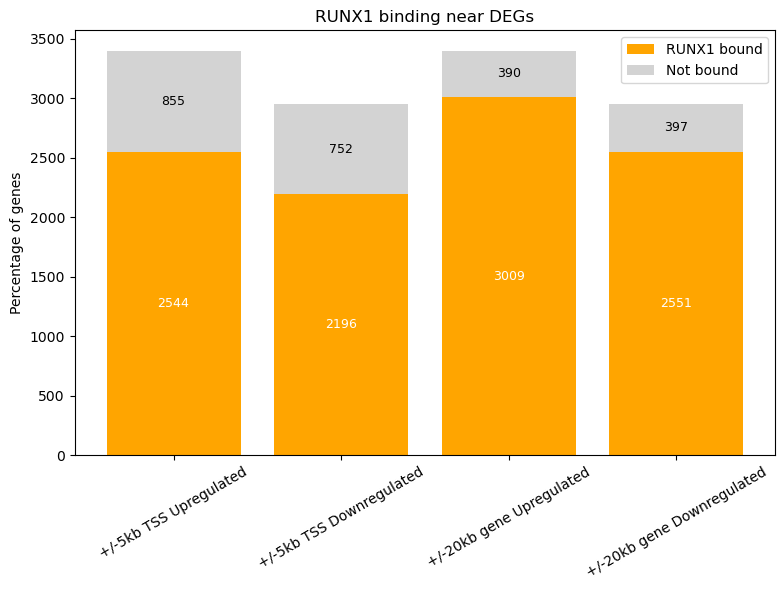

In [16]:
x = range(len(labels))

# Create the plot
plt.figure(figsize=(8, 6))
plt.bar(x, bound, color='orange', label='RUNX1 bound')
plt.bar(x, not_bound, bottom=bound, color='lightgray', label='Not bound')

# Annotate bars
for i in range(len(labels)):
    plt.text(i, bound[i]/2, str(bound[i]), ha='center', va='center', color='white', fontsize=9)
    plt.text(i, bound[i] + not_bound[i]/2, str(not_bound[i]), ha='center', va='center', color='black', fontsize=9)

# Formatting
plt.xticks(x, labels,rotation = 30)
plt.ylabel("Percentage of genes")
plt.title("RUNX1 binding near DEGs")
plt.legend()
plt.tight_layout()

plt.show()

There is a difference in the figure. I observed more genes in general than the article found. The differences could stem from any small difference in the whole workflow. For example, there could be a variation in sequencing depth, different normalization or visualization parameters (e.g., bin size, scale, smoothing).

### MALAT1

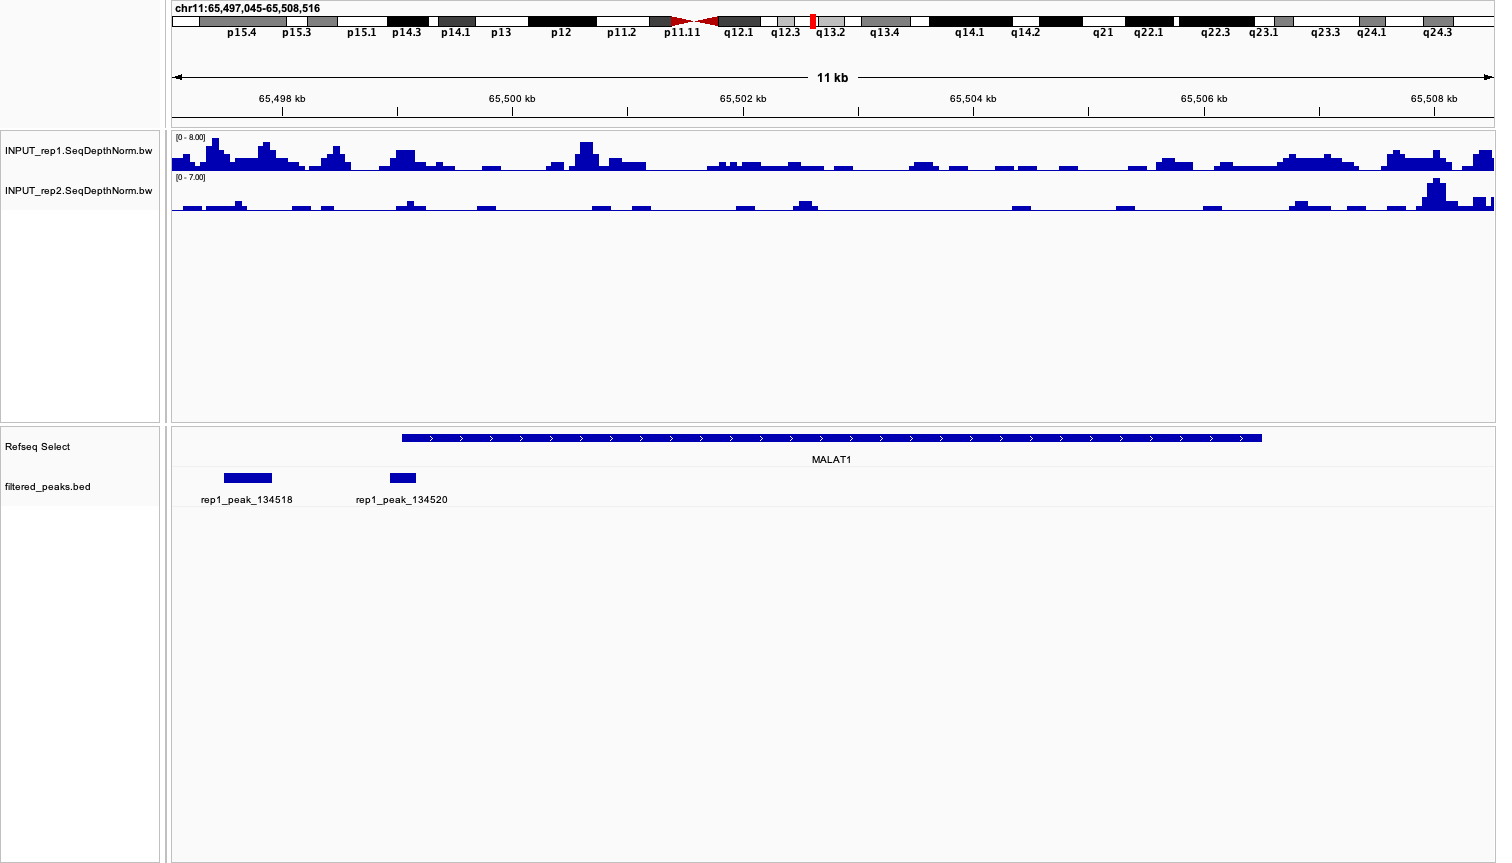

The two peaks in the article and from my results are there. The results appear pretty consistent.

### NEAT1

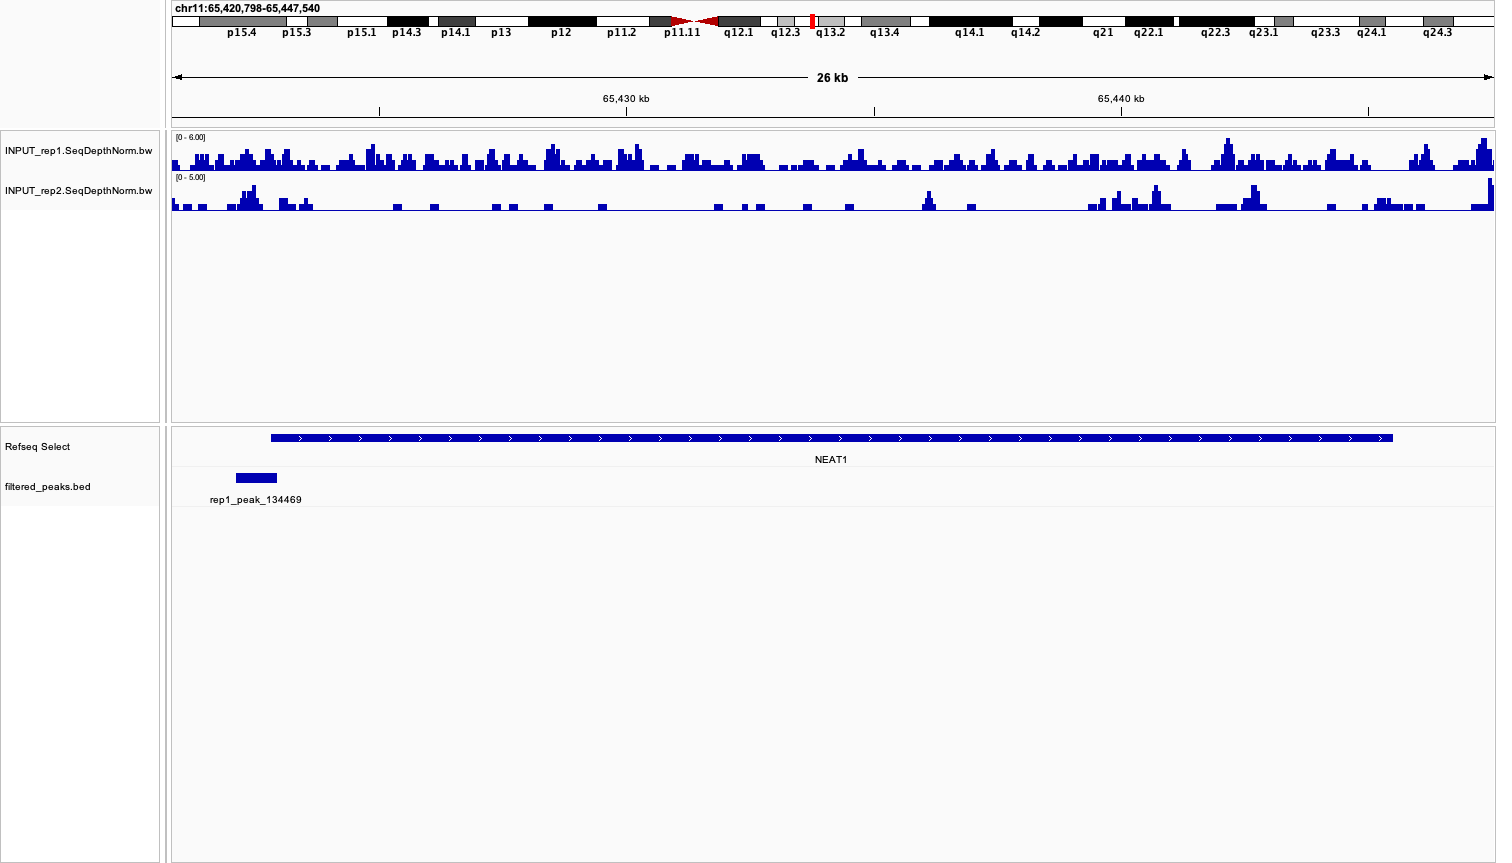

For NEAT1, the results appear very different. There are two ver prominent peaks in the article, but for my results, there are not prominent peaks, but a lot of small peaks appearing pretty consistent. So, according to my results, the whole gene is enriched.

## Creating Figure S2A, B and C
### S2A

In [17]:
table_s2a = pd.DataFrame(columns = ['Sample Name','Biological Replicate','Raw Reads','Mapped Reads'])
table_s2a['Sample Name'] = ['IP 1', 'IP 2', 'Input 1', 'Input 2']
table_s2a['Biological Replicate'] = [1,2,1,2]
table_s2a['Raw Reads'] = [28640127,28968209,29054771,10483282]
table_s2a['Mapped Reads'] = [27036082,27480992,27484968,9779996]
table_s2a

,Sample Name,Biological Replicate,Raw Reads,Mapped Reads
0,IP 1,1,28640127,27036082
1,IP 2,2,28968209,27480992
2,Input 1,1,29054771,27484968
3,Input 2,2,10483282,9779996


There is a difference in the number of raw and mapped reads. I have a lower number of raw reads, but a higher number of mapped reads.  
Reasons:  
a. QC was different, or maybe they used some other libraries for mapping and trimming.  
b. Sequencing Depth

### S2B

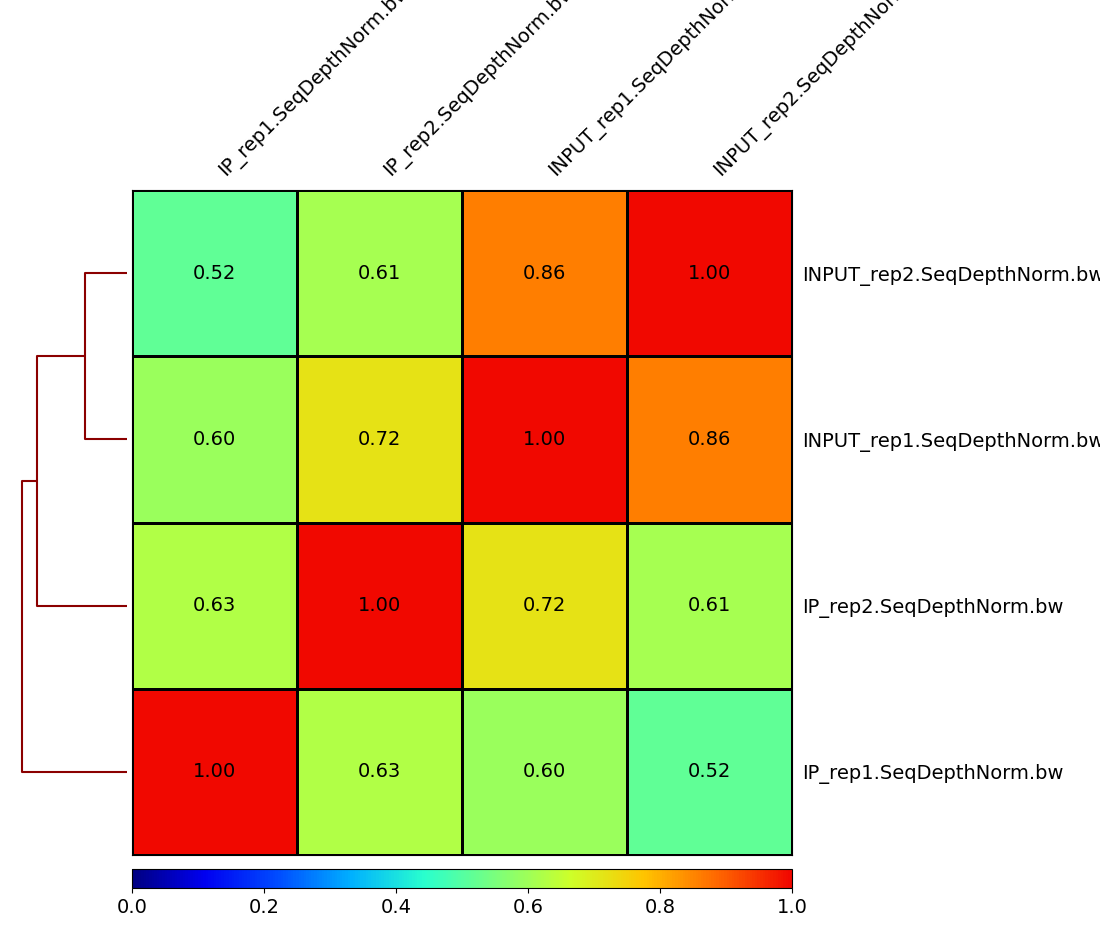

In [18]:
display(Image(filename = 'results/correlation_matrix.png'))

The correlation is slightly lower than the ones from the article. Except input rep1 and IP rep2 have slightly higher (0.69 originally and 0.72 for mine).  
My QC was different than the authors, that's why all the further analysis are different.

### S2C

In [19]:
count_rep1 = pd.read_csv('results/rep1_peaks.narrowPeak', sep = '\t', header = None)
count_rep1 = len(count_rep1[3].unique())
count_rep2 = pd.read_csv('results/rep2_peaks.narrowPeak', sep = '\t', header = None)
count_rep2 = len(count_rep2[3].unique())
consensus = pd.read_csv('results/consensus_peaks.bed', sep = '\t', header = None)
consensus = len(consensus[3].unique())
count_rep1, count_rep2, consensus

(904023, 103206, 28904)

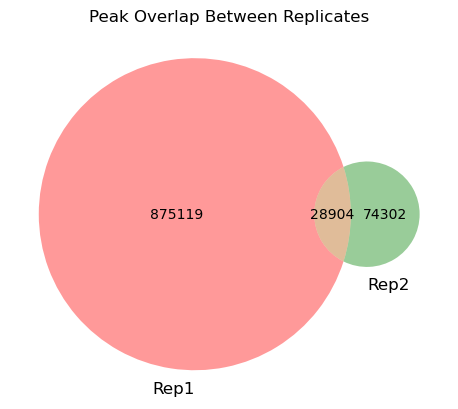

In [20]:
only_rep1 = count_rep1 - consensus
only_rep2 = count_rep2 - consensus
both = consensus

# Plot
venn2(subsets=(only_rep1, only_rep2, both), set_labels=('Rep1', 'Rep2'))
plt.title('Peak Overlap Between Replicates')
plt.show()

It is VERY different than the figures the authors have.  
I have a very number of peaks from replicate 1. It boils down to the libraries that were used and the parameters.

### In your created notebook, detail the methodology used to perform the enrichment. Create a single figure / plot / table that displays some of the top results from the analysis. Comment briefly in a paragraph about the results you observe and why they may be interesting.

To identify transcription factor binding motifs enriched in the ChIP-seq peaks, HOMER Annotating tool was used. The input for this analysis was the filtered_peaks.bed file, which contains reproducible peaks after blacklisted regions were removed. HOMER’s findMotifsGenome.pl script with ran with the hg38 genome and a window size of 200 bp around each peak center. The -mask option was used to avoid repeat regions in the genome.

In [22]:
my_df.head(n = 10)

,PeakID (cmd=annotatePeaks.pl results/filtered_peaks.bed hg38),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
0,rep1_peak_270805,chr15,70462783,70463445,+,24559,NaN,Intergenic,Intergenic,42814.0,NR_146562,105370880.0,NaN,NR_146562,ENSG00000259473,LINC02205,-,long intergenic non-protein coding RNA 2205,ncRNA
1,rep1_peak_62385,chr1,205211240,205211902,+,24460,NaN,"5' UTR (NM_199462, exon 1 of 12)","5' UTR (NM_199462, exon 1 of 12)",131.0,NM_015375,25778.0,NaN,NM_015375,ENSG00000133059,DSTYK,CAKUT1|DustyPK|HDCMD38P|RHDNS1|RIP5|RIPK5|SPG23,dual serine/threonine and tyrosine protein kinase,protein-coding
2,rep1_peak_676008,chr5,178078105,178078779,+,22489,NaN,Intergenic,L3|LINE|CR1,-35090.0,NM_015111,23138.0,NaN,NM_015111,ENSG00000145911,N4BP3,LZTS4,NEDD4 binding protein 3,protein-coding
3,rep1_peak_292482,chr16,11915882,11916377,+,21004,NaN,promoter-TSS (NM_002094),promoter-TSS (NM_002094),-173.0,NM_001130006,2935.0,NaN,NM_002094,ENSG00000103342,GSPT1,551G9.2|ETF3A|GST1|eRF3a,G1 to S phase transition 1,protein-coding
4,rep1_peak_394753,chr2,11498528,11498961,+,19655,NaN,Intergenic,Intergenic,-32567.0,NM_001278277,1876.0,NaN,NM_198256,ENSG00000169016,E2F6,E2F-6,E2F transcription factor 6,protein-coding
5,rep1_peak_482635,chr20,47319628,47320245,+,16964,NaN,"non-coding (NR_024594, exon 1 of 1)","non-coding (NR_024594, exon 1 of 1)",1434.0,NR_024594,100131496.0,NaN,NR_024594,ENSG00000267882,LOC100131496,-,uncharacterized LOC100131496,ncRNA
6,rep1_peak_807489,chr8,102600554,102601608,+,16798,NaN,Intergenic,CpG,49492.0,NM_024410,4956.0,NaN,NM_024410,ENSG00000155087,ODF1,CT133|HSPB10|ODF|ODF2|ODF27|ODFP|ODFPG|ODFPGA|...,outer dense fiber of sperm tails 1,protein-coding
7,rep1_peak_262640,chr15,50354821,50355619,+,16055,NaN,promoter-TSS (NM_005254),promoter-TSS (NM_005254),-22.0,NM_001320915,2553.0,NaN,NM_002041,ENSG00000104064,GABPB1,BABPB2|E4TF1|E4TF1-47|E4TF1-53|E4TF1B|GABPB|GA...,GA binding protein transcription factor subuni...,protein-coding
8,rep1_peak_575478,chr3,170221900,170222506,+,13240,NaN,promoter-TSS (NM_002740),promoter-TSS (NM_002740),-221.0,NM_002740,5584.0,NaN,NM_002740,ENSG00000163558,PRKCI,DXS1179E|PKCI|nPKC-iota,protein kinase C iota,protein-coding
9,rep1_peak_829571,chr9,15510880,15511383,+,12278,NaN,promoter-TSS (NM_001317900),promoter-TSS (NM_001317900),-112.0,NM_001128217,11168.0,NaN,NM_021144,ENSG00000164985,PSIP1,DFS70|LEDGF|PAIP|PSIP2|p52|p75,PC4 and SRSF1 interacting protein 1,protein-coding


Most of the enriched genes are protein coding.